# Original network

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from joblib import dump, load

In [3]:
Target = pd.read_csv('musae_ENGB_target.csv')
Edges = pd.read_csv('musae_ENGB_edges.csv')

In [4]:
#create network from edges set
edge = [list(i) for i in zip(Edges['from'], Edges['to'])]
G = nx.Graph()
G.add_edges_from(edge)
nx.set_edge_attributes(G, "SlateBlue", "color")

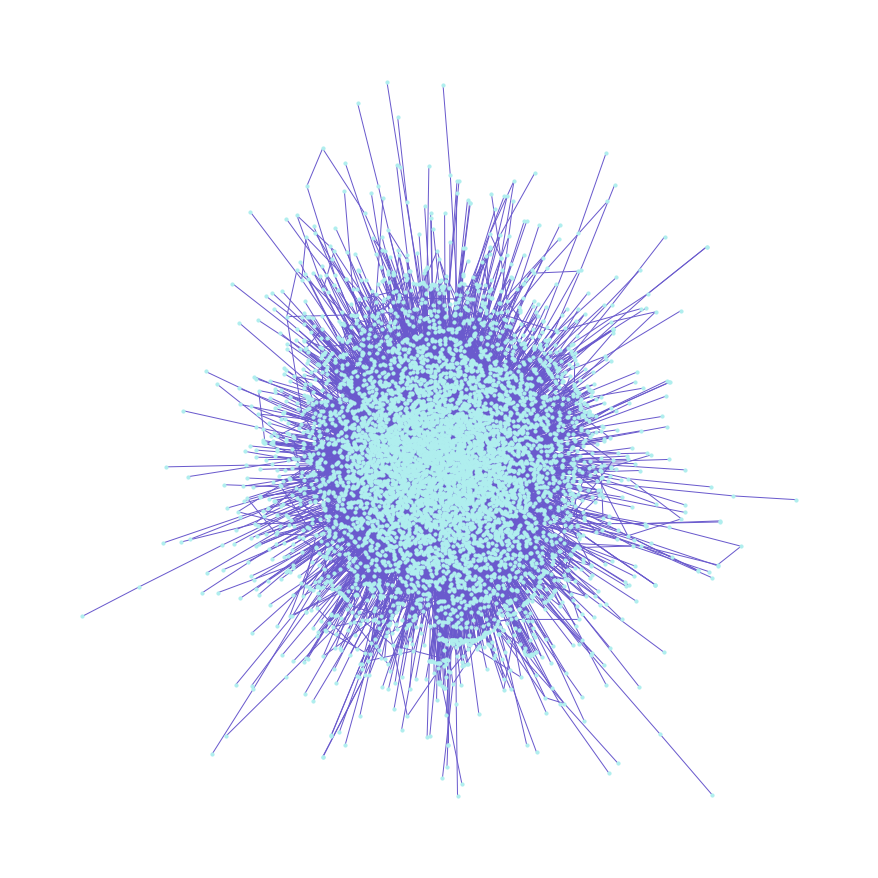

In [5]:
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
plt.figure(figsize=(12,12)) 
nx.draw(G,node_color="PaleTurquoise", node_size=10,edge_color=colors, with_labels=False)
plt.show()

# Data Processing

In [6]:
adj_G = nx.to_numpy_matrix(G)
target_pairs = np.where(adj_G == 0)

In [7]:
target_pairs = [[target_pairs[0][i],target_pairs[1][i]] for i in range(len(target_pairs[0])) if target_pairs[0][i]!=target_pairs[1][i]]

In [8]:
len(target_pairs)

50702102

In [9]:
from random import sample
target_pairs_sample = sample(target_pairs, 500000)

In [10]:
from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(G, dimensions = 50, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:40<00:00,  1.23it/s]


In [11]:
x = []
for i in range(len(target_pairs_sample)):
    x.append(n2w_model.wv[target_pairs_sample[i][0]]+n2w_model.wv[target_pairs_sample[i][1]])

# Logistic Regression Predictions

In [12]:
lr = load("lr.joblib")
lr_pred = lr.predict(x)

In [13]:
unique, counts = np.unique(lr_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 178119]
 [     1 321881]]


In [14]:
lr_edge = []
for i in range(len(lr_pred)):
    if lr_pred[i] == 1:
        lr_edge.append(target_pairs_sample[i])

In [15]:
G_lr = G.__class__()
G_lr.add_nodes_from(G)
G_lr.add_edges_from(G.edges)
for e in G.edges():
    G_lr[e[0]][e[1]]["color"] = "SlateBlue"

In [16]:
G_lr.add_edges_from(lr_edge)
for e in lr_edge:
    G_lr[e[0]][e[1]]["color"] = "Orange"

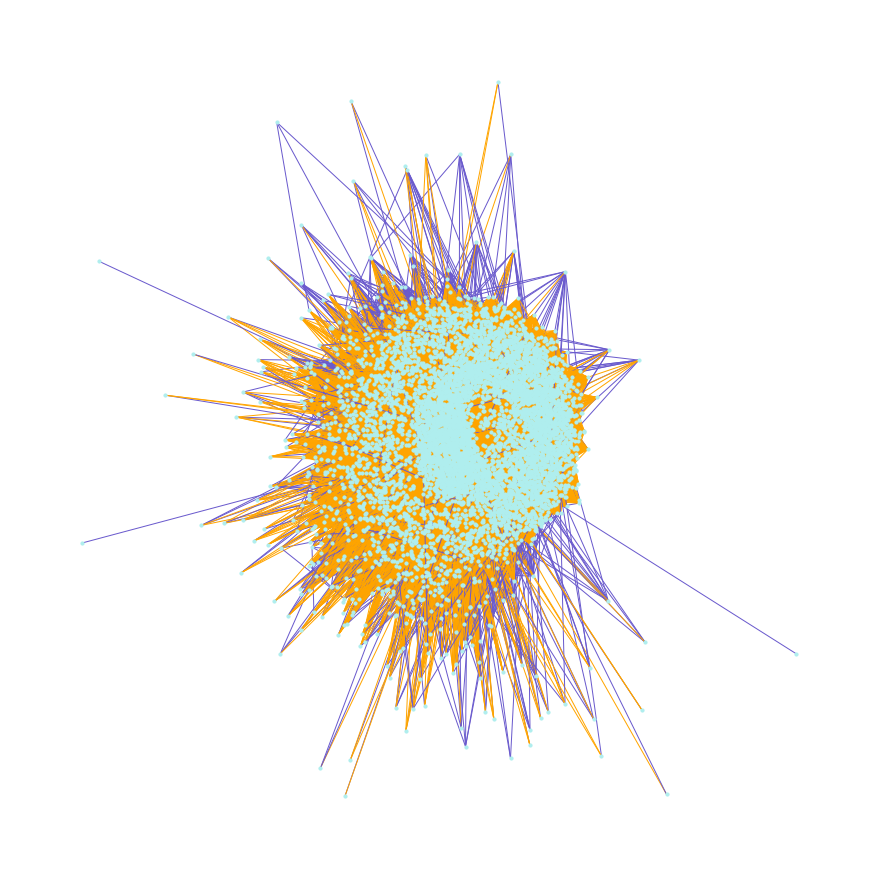

In [17]:
colors = [G_lr[u][v]['color'] for u,v in G_lr.edges()]
plt.figure(figsize=(12,12)) 
nx.draw(G_lr,node_color="PaleTurquoise", node_size=10, edge_color=colors, with_labels=False)
plt.show()

# Neural Network Predictions

In [18]:
nn = load("mlp.joblib")
nn_pred = nn.predict(x)

In [19]:
unique, counts = np.unique(nn_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 468565]
 [     1  31435]]


In [20]:
nn_edge = []
for i in range(len(nn_pred)):
    if nn_pred[i] == 1:
        nn_edge.append(target_pairs_sample[i])

In [21]:
G_nn = G.__class__()
G_nn.add_nodes_from(G)
G_nn.add_edges_from(G.edges)
for e in G.edges():
    G_nn[e[0]][e[1]]["color"] = "SlateBlue"

In [22]:
G_nn.add_edges_from(nn_edge)
for e in nn_edge:
    G_nn[e[0]][e[1]]["color"] = "Orange"

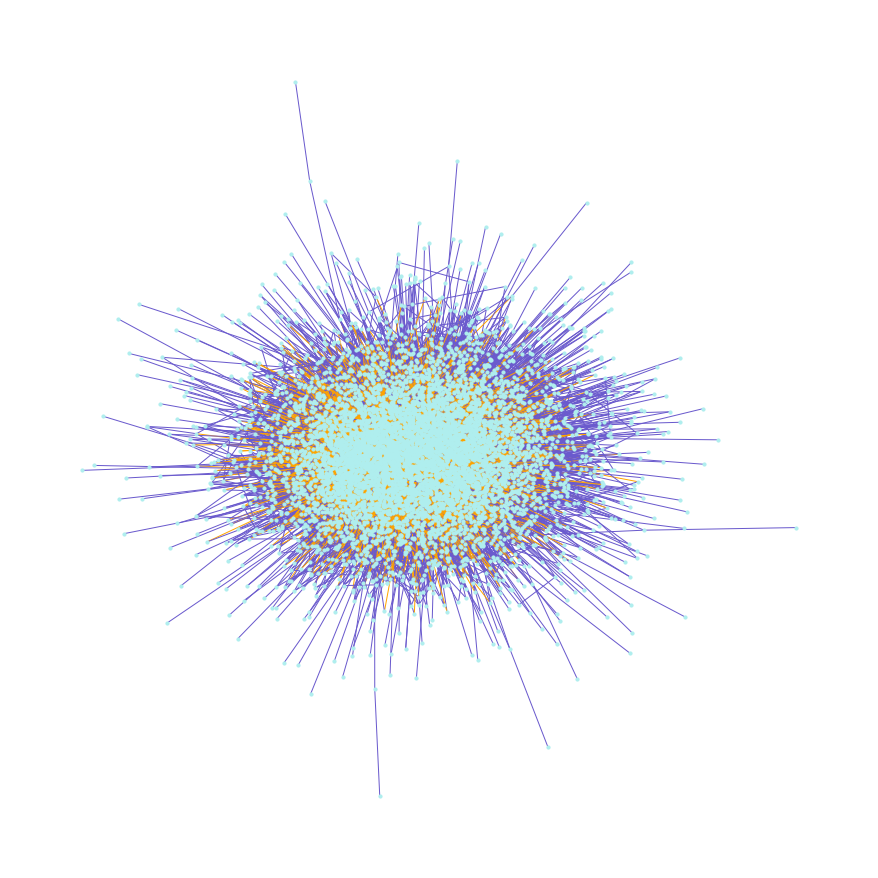

In [23]:
colors = [G_nn[u][v]['color'] for u,v in G_nn.edges()]
plt.figure(figsize=(12,12)) 
nx.draw(G_nn,node_color="PaleTurquoise", node_size=10, edge_color=colors, with_labels=False)
plt.show()

# SVM Predictions

In [24]:
svc = load("svc.joblib")
svc_pred = svc.predict(x)

In [25]:
unique, counts = np.unique(svc_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 488750]
 [     1  11250]]


In [26]:
svc_edge = []
for i in range(len(svc_pred)):
    if svc_pred[i] == 1:
        svc_edge.append(target_pairs_sample[i])

In [27]:
G_svc = G.__class__()
G_svc.add_nodes_from(G)
G_svc.add_edges_from(G.edges)
for e in G.edges():
    G_svc[e[0]][e[1]]["color"] = "SlateBlue"

In [28]:
G_svc.add_edges_from(svc_edge)
for e in svc_edge:
    G_svc[e[0]][e[1]]["color"] = "Orange"

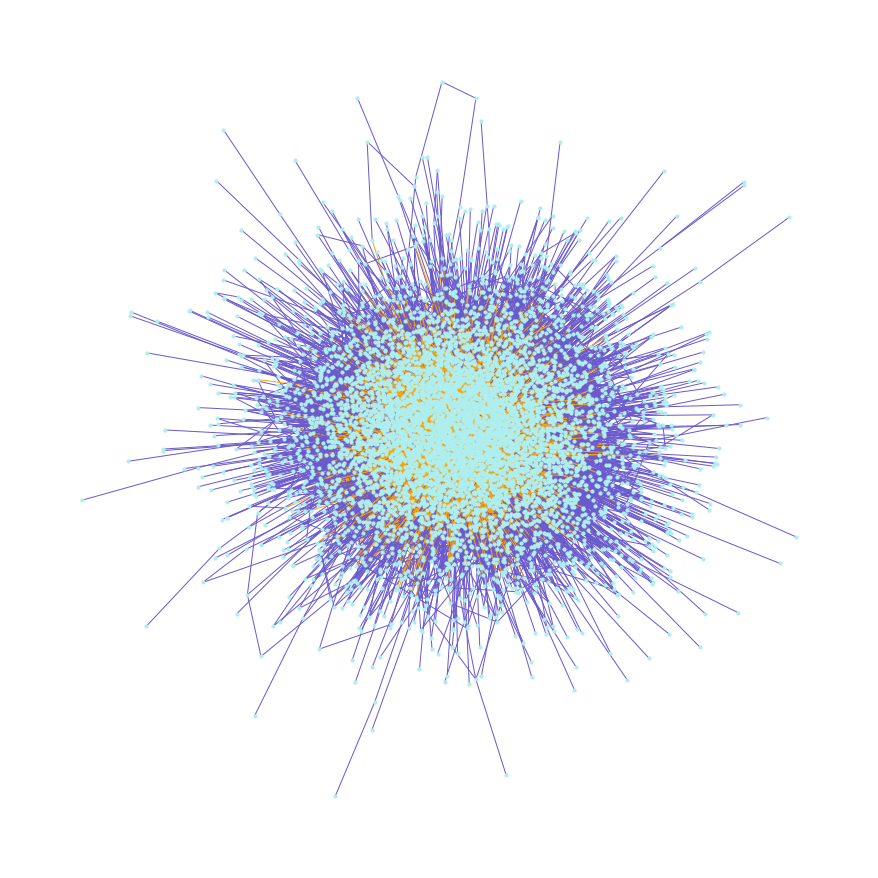

In [29]:
colors = [G_svc[u][v]['color'] for u,v in G_svc.edges()]
plt.figure(figsize=(12,12)) 
nx.draw(G_svc,node_color="PaleTurquoise", node_size=10, edge_color=colors, with_labels=False)
plt.show()

# Adaboosted Decision Tree

In [30]:
bdt = load("bdt.joblib")
bdt_pred = bdt.predict(x)

In [31]:
unique, counts = np.unique(bdt_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 242403]
 [     1 257597]]


In [32]:
bdt_edge = []
for i in range(len(bdt_pred)):
    if bdt_pred[i] == 1:
        bdt_edge.append(target_pairs_sample[i])

In [33]:
G_bdt = G.__class__()
G_bdt.add_nodes_from(G)
G_bdt.add_edges_from(G.edges)
for e in G.edges():
    G_bdt[e[0]][e[1]]["color"] = "SlateBlue"

In [34]:
G_bdt.add_edges_from(bdt_edge)
for e in bdt_edge:
    G_bdt[e[0]][e[1]]["color"] = "Orange"

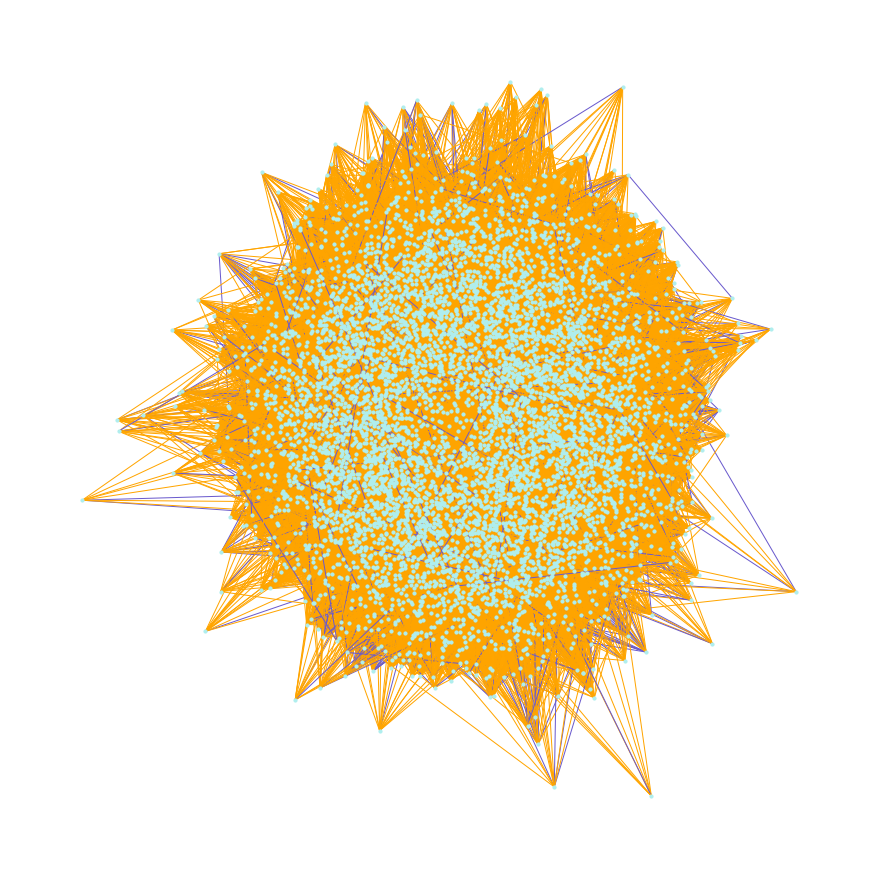

In [35]:
colors = [G_bdt[u][v]['color'] for u,v in G_bdt.edges()]
plt.figure(figsize=(12,12)) 
nx.draw(G_bdt,node_color="PaleTurquoise", node_size=10, edge_color=colors, with_labels=False)
plt.show()